## Before reading
Hi, I'm a novice in data science and this is my first kaggle competition.
I spend some hours to write this kernel because I want to share my ideas with others.

If you find mistakes on method,code or spelling. Please comment below.(I'm not native English speaker so please correct my English :)

I am still working on the rest parts and I want to meet some teammates(I hope better than me...)to join other active competions. I'm a graduate student and I have lots of time on it so if you need a teammate PLEASE comment! Thank you!

# Handling the missing values
This part is about how to handle the missing values. 
Having read lots of kernels about missing values, I try to find the best way for understanding the logic to handle the missing values

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv


In [2]:
import pandas as pd
sample_submission = pd.read_csv("../input/house-prices-advanced-regression-techniques/sample_submission.csv")
test = pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv")
train = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")

In [3]:
train[:10]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


First we drop the "ID" and remove the outliars from the dataset

In [4]:
train_id = train['Id']
test_id = test['Id']
train.drop('Id',inplace = True, axis = 1)
test.drop('Id',inplace = True, axis = 1)

In [5]:
train = train[train.GrLivArea < 4500]
train.reset_index(drop = True, inplace = True)
outliars = [30, 88, 462, 631, 1322]
train.drop(train.index[outliars], inplace = True)
#If you want to know why remove these values u can read kernels about EDA

In [6]:
#we don't need SalePrice so drop it
train.drop('SalePrice', inplace=True, axis=1)
data_features = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],test.loc[:,'MSSubClass':'SaleCondition'])).reset_index(drop=True)

## Handle the first five variables
Ok we have get the data we want.First we observe the all missing values and the their percentage. 

In [7]:
#first get the total missing values
total = data_features.isnull().sum().sort_values(ascending=False)
total = total[total>0]
percent = total/len(data_features)
percent
missing_data = pd.concat((total,percent),axis=1,keys=['total','percent'])
missing_data

,total,percent
PoolQC,2903,0.996909
MiscFeature,2807,0.963942
Alley,2715,0.932349
Fence,2344,0.804945
FireplaceQu,1418,0.486951
LotFrontage,486,0.166896
GarageCond,158,0.054258
GarageQual,158,0.054258
GarageYrBlt,158,0.054258
GarageFinish,158,0.054258


We observe the variables one by one.

First the PoolQV. I notice that some kernels fill the NAN with the area of the pool . But you can see that the PoolQC doesn't have positive connection. So we just fill it with NONE.

In [8]:
data_features.loc[(data_features['PoolQC'].notnull()),['PoolArea','PoolQC']]

,PoolArea,PoolQC
195,512,Ex
805,648,Fa
1165,576,Gd
1177,555,Ex
1379,519,Fa
1416,738,Gd
1967,144,Ex
2566,228,Ex
2703,800,Gd


For MiscFeature,Alley,Fence,they seem like they have no connection with other variables. And from the data description we know the NA means NONE for this facility.So we can use NONE to fill these variables

The variable FireplaceQu may have correlation with the Fireplaces, but from the groupby observation it's not true.So we fill it with NONE too.

In [9]:
#The code below just for a simple look
a = data_features.loc[data_features['MiscFeature'].notnull(),'MiscFeature']
data_features.loc[data_features['MiscFeature'].notnull(),'MiscFeature'].value_counts()

Shed    95
Gar2     5
Othr     4
TenC     1
Name: MiscFeature, dtype: int64

In [10]:
a = data_features.loc[data_features['Alley'].notnull(),'Alley']
data_features.loc[data_features['Alley'].notnull(),'Alley'].value_counts()

Grvl    120
Pave     77
Name: Alley, dtype: int64

In [11]:
a = data_features.loc[data_features['Fence'].notnull(),'Fence']
data_features.loc[data_features['Fence'].notnull(),'Fence'].value_counts()

MnPrv    327
GdPrv    118
GdWo     111
MnWw      12
Name: Fence, dtype: int64

In [12]:
data_features['FireplaceQu'].groupby([data_features['Fireplaces'],data_features['FireplaceQu']]).count()

Fireplaces  FireplaceQu
1           Ex              37
            Fa              63
            Gd             625
            Po              45
            TA             494
2           Ex               5
            Fa              10
            Gd             112
            TA              92
3           Ex               1
            Fa               1
            Gd               4
            TA               4
4           TA               1
Name: FireplaceQu, dtype: int64

## LotFrontage
Two methods: 

1.LotFrontage means the distance from the street. So we can use the neighborhood's data to fill it. 

2.Use the connection with 'LotArea' and the poly to get the values of the LotFrontage. 

I try both methods and will choose the better one in the final try.


In [13]:
data_features.groupby('Neighborhood')['LotFrontage'].mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    65.153409
Gilbert    74.207207
IDOTRR     61.882353
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.476190
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.701031
SawyerW    70.669811
Somerst    64.484472
StoneBr    62.173913
Timber     81.157895
Veenker    72.000000
Name: LotFrontage, dtype: float64

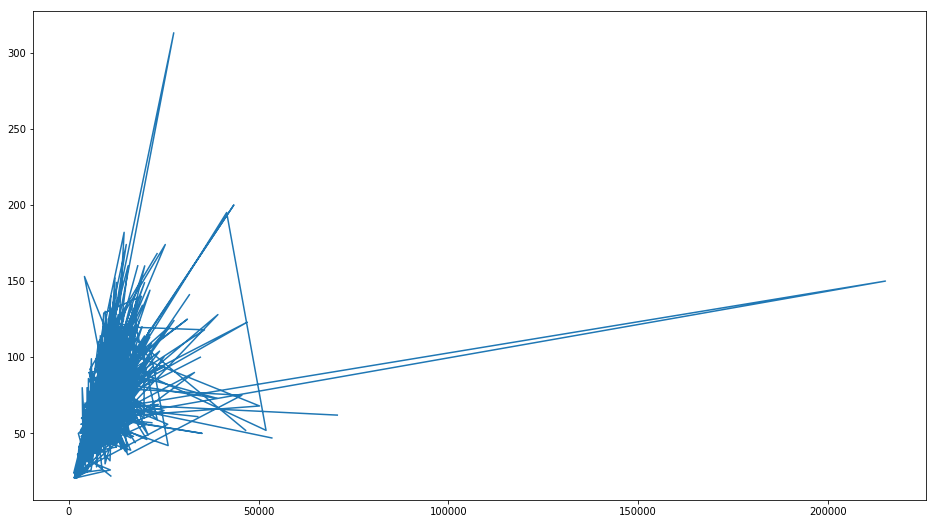

In [14]:
plt.figure(figsize=(16,9))
plt.plot(data_features['LotArea'], data_features['LotFrontage'])

In [15]:
x = data_features.loc[(data_features['LotArea'].notnull()), 'LotArea']
y = data_features.loc[(data_features['LotFrontage'].notnull()), 'LotFrontage']
t = (x<25000) & (y<150)
coef = np.polyfit(x[t], y[t],1)
formula = np.poly1d(coef)
poly_y = formula(data_features['LotArea'])
condition_frontage = (data_features['LotFrontage'].isnull())
data_features.loc[condition_frontage,'LotFrontage'] = formula(data_features.loc[condition_frontage,'LotArea'])
#use neighborhood to fill
#data_features['LotFrontage'] = data_features.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.mode()[0]))

## Garage variables
Next six variables are about garage. So we can handle them together.

In [16]:
data_features['MSSubClass'].groupby((data_features['GarageCond'],data_features['GarageQual'])).count()
#These two variables have positive correlation.So we can use the mode to fill the missing in GarageCond and GarageQual. 

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  """Entry point for launching an IPython kernel.


GarageCond  GarageQual
Ex          Ex               2
            Gd               1
Fa          Fa              39
            Po               1
            TA              33
Gd          Gd               6
            TA               9
Po          Fa               8
            Po               4
            TA               2
TA          Ex               1
            Fa              77
            Gd              17
            TA            2554
Name: MSSubClass, dtype: int64

In [17]:
data_features.loc[(data_features['GarageCond'].isnull() & data_features['GarageQual'].notnull()), ['GarageQual']]
#it seems like they have the same missing values.
#the same for the two below
#so fill them all with NONE

,GarageQual


In [18]:
data_features.loc[(data_features['GarageCond'].isnull() & data_features['GarageYrBlt'].notnull()), ['GarageYrBlt']]

,GarageYrBlt


In [19]:
data_features.loc[(data_features['GarageCond'].isnull() & data_features['GarageFinish'].notnull()), ['GarageFinish']]

,GarageFinish


In [20]:
data_features.loc[(data_features['GarageYrBlt'].isnull() & data_features['GarageType'].notnull())
                  ,['GarageYrBlt','GarageType','GarageCond','GarageFinish','GarageQual']]
#so we use the value of GarageType to fill the other four variables
garage_var = ['GarageYrBlt','GarageType','GarageCond','GarageFinish','GarageQual']
condition1 = (data_features['GarageYrBlt'].isnull() & data_features['GarageType'].notnull())
for col in garage_var:
    data_features.loc[condition1,col] = data_features[(data_features['GarageType'] == 'Detchd')][col].mode()[0]
#Note that we still have 156 missing values to fill for all 5 variables

## Basement variables

In [21]:
#handle them in the same way as garage
missing_data[11:]

,total,percent
BsmtCond,82,0.028159
BsmtExposure,82,0.028159
BsmtQual,81,0.027816
BsmtFinType2,80,0.027473
BsmtFinType1,79,0.027129
MasVnrType,24,0.008242
MasVnrArea,23,0.007898
MSZoning,4,0.001374
BsmtHalfBath,2,0.000687
Utilities,2,0.000687


In [22]:
data_features[(data_features['BsmtFinType1'].isnull() & data_features['BsmtCond'].notnull())]
#We detect that all bsmt variables have 79 common missing values. Obviously these data mean there are no basements in these houses.
#So we use the NONE to fill them like the garage variables.

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition


In [23]:
data_features[(data_features['BsmtFinType1'].notnull() & data_features['BsmtExposure'].isnull())][
    ['BsmtCond','BsmtExposure','BsmtQual','BsmtFinType1','BsmtFinType2']]

,BsmtCond,BsmtExposure,BsmtQual,BsmtFinType1,BsmtFinType2
943,TA,NaN,Gd,Unf,Unf
1480,TA,NaN,Gd,Unf,Unf
2341,TA,NaN,Gd,Unf,Unf


In [24]:
data_features['MSSubClass'].groupby((data_features['BsmtQual'],data_features['BsmtExposure'])).count()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  """Entry point for launching an IPython kernel.


BsmtQual  BsmtExposure
Ex        Av                61
          Gd                89
          Mn                20
          No                85
Fa        Gd                 2
          Mn                10
          No                76
Gd        Av               261
          Gd               139
          Mn               112
          No               694
TA        Av                95
          Gd                44
          Mn                97
          No              1043
Name: MSSubClass, dtype: int64

In [25]:
data_features['MSSubClass'].groupby((data_features['BsmtCond'],data_features['BsmtExposure'])).count()
#When Con is TA and Qual is Gd we shuold choose No to fill the missing value in 'BsmtExposure'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  """Entry point for launching an IPython kernel.


BsmtCond  BsmtExposure
Fa        Av                 3
          Gd                 1
          Mn                10
          No                89
Gd        Av                21
          Gd                23
          Mn                12
          No                66
Po        Gd                 1
          No                 4
TA        Av               392
          Gd               249
          Mn               216
          No              1740
Name: MSSubClass, dtype: int64

In [26]:
condition2 = (data_features['BsmtFinType1'].notnull() & data_features['BsmtExposure'].isnull())
data_features.loc[condition2,'BsmtExposure'] = 'No'

Do the same detection.

In [27]:
data_features[(data_features['BsmtFinType1'].notnull() & data_features['BsmtCond'].isnull())][
    ['BsmtCond','BsmtExposure','BsmtQual','BsmtFinType1','BsmtFinType2']]


,BsmtCond,BsmtExposure,BsmtQual,BsmtFinType1,BsmtFinType2
2033,NaN,Mn,Gd,GLQ,Rec
2178,NaN,No,TA,BLQ,Unf
2517,NaN,Av,TA,ALQ,Unf


In [28]:
data_features['MSSubClass'].groupby((data_features['BsmtExposure'],data_features['BsmtCond'])).count()
#The proportion of TA is larger than other values so use TA to fill 'BsmtCond'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  """Entry point for launching an IPython kernel.


BsmtExposure  BsmtCond
Av            Fa             3
              Gd            21
              TA           392
Gd            Fa             1
              Gd            23
              Po             1
              TA           249
Mn            Fa            10
              Gd            12
              TA           216
No            Fa            89
              Gd            66
              Po             4
              TA          1743
Name: MSSubClass, dtype: int64

In [29]:
condition3 = (data_features['BsmtFinType1'].notnull() & data_features['BsmtCond'].isnull())
data_features.loc[condition3,'BsmtCond'] = 'TA'

For left three variables.

In [30]:
data_features[(data_features['BsmtFinType1'].notnull() & data_features['BsmtQual'].isnull())][
    ['BsmtCond','BsmtExposure','BsmtQual','BsmtFinType1','BsmtFinType2']]

,BsmtCond,BsmtExposure,BsmtQual,BsmtFinType1,BsmtFinType2
2210,Fa,No,NaN,Unf,Unf
2211,TA,No,NaN,Unf,Unf


In [31]:
data_features['MSSubClass'].groupby((data_features['BsmtExposure'],data_features['BsmtQual'])).count()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  """Entry point for launching an IPython kernel.


BsmtExposure  BsmtQual
Av            Ex            61
              Gd           261
              TA            95
Gd            Ex            89
              Fa             2
              Gd           139
              TA            44
Mn            Ex            20
              Fa            10
              Gd           112
              TA            97
No            Ex            85
              Fa            76
              Gd           697
              TA          1043
Name: MSSubClass, dtype: int64

In [32]:
data_features['MSSubClass'].groupby((data_features['BsmtCond'],data_features['BsmtQual'])).count()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  """Entry point for launching an IPython kernel.


BsmtCond  BsmtQual
Fa        Fa            22
          Gd             9
          TA            71
Gd        Ex            23
          Fa             2
          Gd            66
          TA            31
Po        Ex             1
          Fa             3
          TA             1
TA        Ex           231
          Fa            61
          Gd          1134
          TA          1176
Name: MSSubClass, dtype: int64

In [33]:
#Fill with TA again
condition4 = (data_features['BsmtFinType1'].notnull() & data_features['BsmtQual'].isnull())
data_features.loc[condition4,'BsmtQual'] = data_features.loc[(data_features['BsmtExposure'] == 'No'),'BsmtQual'].mode()[0]

In [34]:
#The last one 
condition5 = (data_features['BsmtFinType2'].isnull() & data_features['BsmtFinType1'].notnull())
data_features[condition5][['BsmtFinType1','BsmtFinType2']]
#From the data description 

,BsmtFinType1,BsmtFinType2
330,GLQ,NaN


In [35]:
data_features['MSSubClass'].groupby((data_features['BsmtFinType1'],data_features['BsmtFinType2'])).count()
#I guess even if Type1 is good , the Type 2 is more likely to be Unf. So fill 'BsmtFinType2' by Unf
data_features.loc[condition5, 'BsmtFinType2'] = 'Unf'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  """Entry point for launching an IPython kernel.


## now we will fill bsmt & garage variables with NONE

In [36]:
bsmt_var = ['BsmtCond','BsmtExposure','BsmtQual','BsmtFinType1','BsmtFinType2']
garage_var = ['GarageType','GarageCond','GarageFinish','GarageQual']
NONE_var = ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu']
missing_data = data_features.isnull().sum().sort_values(ascending = False)
missing_data = missing_data[missing_data > 0]
missing_data

PoolQC          2903
MiscFeature     2807
Alley           2715
Fence           2344
FireplaceQu     1418
GarageCond       156
GarageQual       156
GarageType       156
GarageYrBlt      156
GarageFinish     156
BsmtQual          79
BsmtCond          79
BsmtExposure      79
BsmtFinType1      79
BsmtFinType2      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
BsmtFinSF2         1
BsmtUnfSF          1
BsmtFinSF1         1
Exterior2nd        1
TotalBsmtSF        1
Exterior1st        1
SaleType           1
Electrical         1
KitchenQual        1
GarageCars         1
GarageArea         1
dtype: int64

In [37]:
for col in bsmt_var, garage_var,NONE_var:
    data_features[col] = data_features[col].fillna('NONE')
data_features['GarageYrBlt'] = data_features['GarageYrBlt'].fillna(0)

In [38]:
data_features['LotFrontage']

0        65.0
1        80.0
2        68.0
3        60.0
4        84.0
        ...  
2907     21.0
2908     21.0
2909    160.0
2910     62.0
2911     74.0
Name: LotFrontage, Length: 2912, dtype: float64

In [39]:
missing_data = data_features.isnull().sum().sort_values(ascending = False)
missing_data = missing_data[missing_data > 0]
missing_data

MasVnrType      24
MasVnrArea      23
MSZoning         4
Functional       2
BsmtHalfBath     2
BsmtFullBath     2
Utilities        2
SaleType         1
BsmtFinSF1       1
GarageCars       1
Electrical       1
Exterior2nd      1
KitchenQual      1
Exterior1st      1
TotalBsmtSF      1
BsmtUnfSF        1
BsmtFinSF2       1
GarageArea       1
dtype: int64

## Brother MasVnr

In [40]:
condition6 = (data_features['MasVnrType'].isnull() & data_features['MasVnrArea'].notnull())
data_features.loc[condition6,['MasVnrType','MasVnrArea']]

,MasVnrType,MasVnrArea
2603,NaN,198.0


In [41]:
data_features['MasVnrArea'].groupby(data_features['MasVnrType']).describe()

,count,mean,std,min,25%,50%,75%,max
MasVnrType,,,,,,,,
BrkCmn,25.0,195.480000,160.361082,40.0,67.0,161.0,250.0,621.0
BrkFace,877.0,261.542759,210.492881,0.0,120.0,203.0,340.0,1600.0
None,1739.0,0.708453,14.766678,0.0,0.0,0.0,0.0,344.0
Stone,247.0,235.182186,174.095488,0.0,119.5,200.0,297.5,1224.0


In [42]:
data_features['MasVnrArea'].groupby(data_features['MasVnrType']).median()

MasVnrType
BrkCmn     161.0
BrkFace    203.0
None         0.0
Stone      200.0
Name: MasVnrArea, dtype: float64

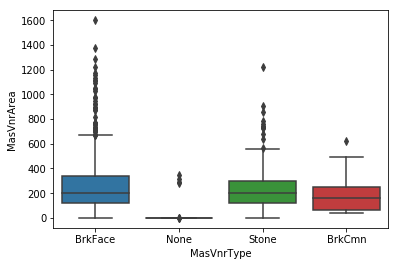

In [43]:
sns.boxplot(data_features['MasVnrType'],data_features['MasVnrArea'])
#Maybe fill it with 'Stone' is more reasonable.
#Something strange here. None means no masonry but there still several values. May theuy are outliars that I should remove?

In [44]:
a = data_features[(data_features['MasVnrType'] == 'None')]['MasVnrArea']
a[a>0]

620     288.0
768       1.0
1225      1.0
1294    344.0
1327    312.0
1662    285.0
2445      1.0
Name: MasVnrArea, dtype: float64

In [45]:
data_features.loc[condition6,'MasVnrType'] = 'Stone'
data_features['MasVnrType'] = data_features['MasVnrType'].fillna('None')
data_features['MasVnrArea'] = data_features['MasVnrArea'].fillna(0)

## MSZoning
THis variable has connection with MSSubclass, so before filling we observe and use groupby to fill.

In [46]:
data_features['MSZoning'].groupby([data_features['MSSubClass'],data_features['MSZoning']]).count()
data_features['MSZoning'] = data_features['MSZoning'].groupby(data_features['MSSubClass']).transform(lambda x:x.fillna(x.mode()[0]))

## None and 0 
For the rest of the variables , I use None or 0 to fill them

In [47]:
missing_data = data_features.isnull().sum().sort_values(ascending = False)
missing_data = missing_data[missing_data > 0]
missing_data

Functional      2
Utilities       2
BsmtFullBath    2
BsmtHalfBath    2
GarageArea      1
BsmtFinSF2      1
BsmtUnfSF       1
TotalBsmtSF     1
KitchenQual     1
SaleType        1
BsmtFinSF1      1
Electrical      1
Exterior1st     1
Exterior2nd     1
GarageCars      1
dtype: int64

In [48]:
NA_for_0 = ['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath',
            'GarageArea', 'GarageCars','MasVnrArea']
for col in NA_for_0:
    data_features[col] = data_features[col].fillna(0)

In [49]:
common_for_NA = ['Exterior1st','Exterior2nd','SaleType','Electrical','KitchenQual']
for col in common_for_NA:
    data_features[col].fillna(data_features[col].mode()[0], inplace = True)

In [50]:
data_features['Functional'] = data_features['Functional'].fillna('Typ')
data_features['Utilities'] = data_features['Utilities'].fillna('None')

In [51]:
missing_data = data_features.isnull().sum().sort_values(ascending = False)
missing_data = missing_data[missing_data > 0]
missing_data

Series([], dtype: int64)

In [52]:
#思考到有三个缺失值不重合的的时候 应该怎么养去填充 或者说 bsmt相关的变量 应该以哪一个为基准去补充缺失值

In [53]:
data_features[(data_features['BsmtCond'].isnull() & data_features['BsmtFinType1'].notnull())][['BsmtQual','BsmtFinType1','BsmtFinType2']]

,BsmtQual,BsmtFinType1,BsmtFinType2


In [54]:
condition1 = (data_features['BsmtCond'].isnull() & data_features['BsmtExposure'].notnull())
data_features[condition1]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
